In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scripts import optimization, model
import pickle
import nest



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 11:53:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [ ]:
nest.rng_seed = 1
np.random.seed(1)
nest.set_verbosity('M_FATAL')

In [3]:
first_weights = np.zeros((10, 10))

for i in range(5):
    first_weights[i][0:5] = np.abs(np.random.normal(1, scale=0.4, size=5))
    first_weights[i + 5][i] = 1

for i in range(10):
    first_weights[i][i] = 0


first_input_weights = np.random.normal(2.5, scale=3, size=(5, 3000))

with open('/hpc/mzhu843/modelling/nest/DATA/processed/model2/categorized_neurons.pkl', 'rb') as file:
    # Load the object from the file
    small_categorized_neurons = pickle.load(file)

In [5]:
network = model.Model2(small_categorized_neurons, first_input_weights, first_weights)

network.simulate()

In [6]:
place_obs = network.get_voltage_traces()

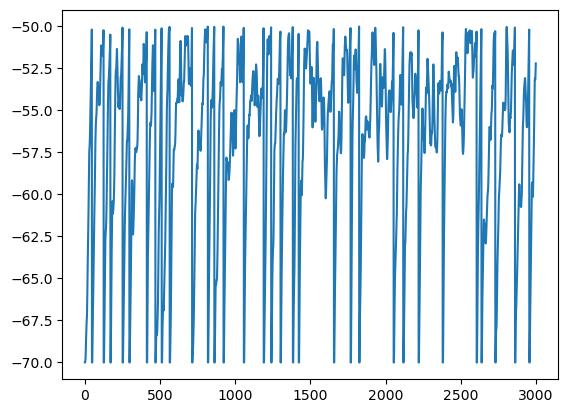

In [7]:
plt.plot(place_obs[0])

In [8]:
second_weights = np.zeros((10, 10))

for i in range(5):
    second_weights[i][0:5] = np.abs(np.random.normal(1, scale=0.4, size=5))
    second_weights[i + 5][i] = 1

for i in range(10):
    second_weights[i][i] = 0

second_input_weights = np.random.normal(2.5, scale=3, size=(5, 3000))


In [9]:
move_params = {
    'weights_min': 0.01,
    'weights_max' : 3,
    'weights_change_min' : -0.1,
    'weights_change_max' : 0.1,
    'input_weights_min': -3,
    'input_weights_max' : 3,
    'input_weights_change_min' : -0.2,
    'input_weights_change_max' : 0.2,
    'input_weights_prob' : 0.2,
}

lamb = 0.01

In [10]:
problem = optimization.SimulatedAnnealing2(second_weights, place_obs , lamb, small_categorized_neurons, first_input_weights, move_params)

problem.steps = 1000
x, func = problem.anneal()

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        843.41     0.00%     0.00%     0:07:48     0:00:00

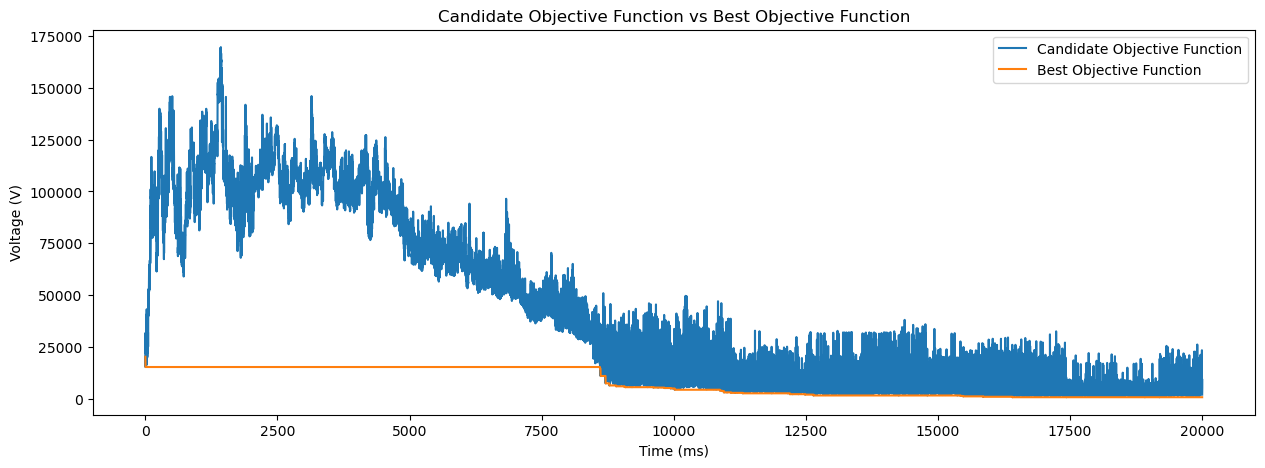

In [11]:
problem.plot_objs()

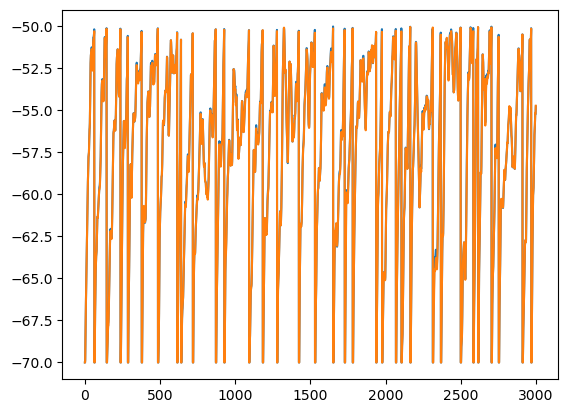

In [12]:
voltage_traces = problem.voltage_traces
plt.plot(place_obs[2])
plt.plot(voltage_traces[2])

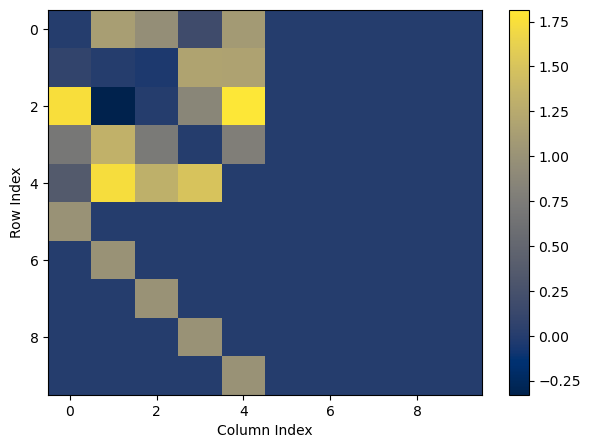

In [13]:
visualizations.plot_matrix(x[0])